#Loading , Exploratory Analysis and Processing Data


The Wisconsin Breast Cancer Dataset (often referred to as the Breast Cancer Wisconsin (Diagnostic) dataset) contains 569 samples of cell nuclei extracted from breast cancer biopsies. Each sample includes 30 numerical features that describe various characteristics of the cell nuclei, such as radius, texture, smoothness, compactness, and concavity. These features are calculated from digitized images of a fine needle aspirate (FNA) of a breast mass.

The dataset is divided into two categories:

Malignant (label 0): Cancerous tumors that are likely to spread.

Benign (label 1): Non-cancerous tumors that are not likely to spread.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target, name="target")  # Target (0 = Malignant, 1 = Benign)

# Combine into one DataFrame for EDA
df = pd.concat([X, y], axis=1)

In [51]:
print(y.value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [3]:
df.shape

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
# Check for missing values
print(df.isnull().sum())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [48]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


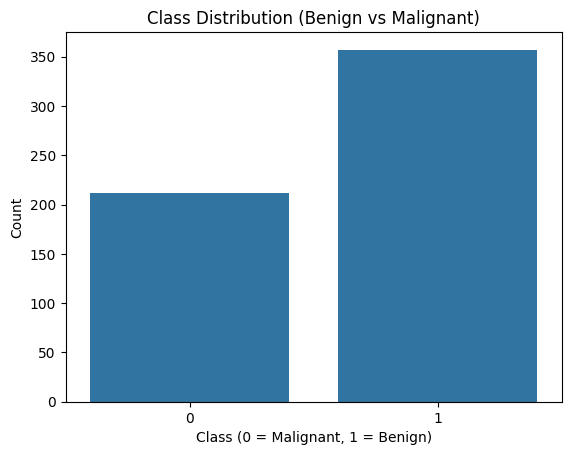

In [6]:
# Count of benign vs. malignant cases
sns.countplot(x=y)
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Class (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()


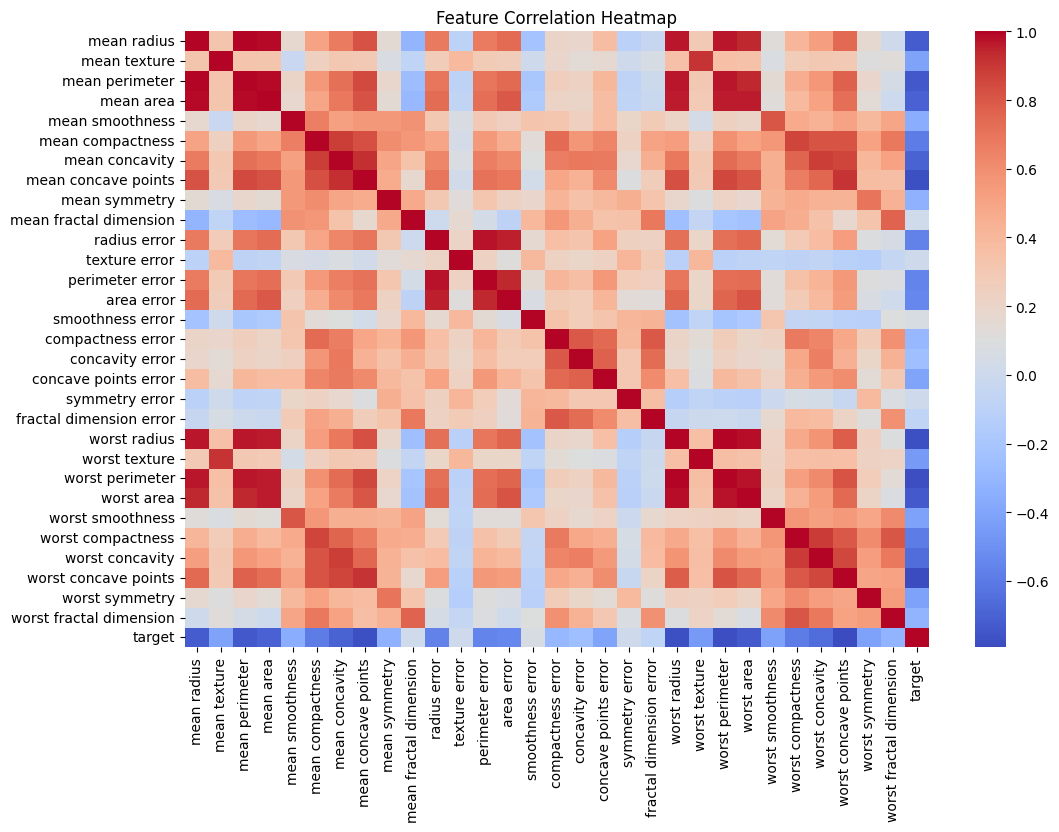

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


Based on this , we can cleary notice that 3 features are correlated together :

Radius , Area and Perimeter which is normal because of the following :

In the context of the Breast Cancer Wisconsin Dataset, these terms refer to the cell nuclei that were measured in the biopsy images, but the features are approximated using geometric properties similar to a circle

So we have :  

$A=πr^2$

$P=2πr$

but we will keep them since we are going to  using SVM and ensemble methods it's perfectly fine to keep the correlated features. These models are generally less affected by multicollinearity compared to models like linear regression

SVM (especially with the RBF kernel) can handle correlated features well because it focuses on creating non-linear decision boundaries and isn't as sensitive to multicollinearity.

Ensemble methods like Random Forest or Gradient Boosting can handle correlated features by randomly selecting subsets of features for splitting in decision trees, so they won’t overfit to correlated features as easily.

In [13]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [56]:
y_test.value_counts()

,count
target,
1,71
0,43


#SVM Training

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report , accuracy_score

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [74]:
# Train an SVM model with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_linear = svm_linear.predict(X_test)

accuracy_linear=accuracy_score(y_test, y_pred_linear)
print("Accuracy:", accuracy_linear)
# Print classification report
print("SVM with Linear Kernel")
print(classification_report(y_test, y_pred_linear))


Accuracy: 0.956140350877193
SVM with Linear Kernel
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



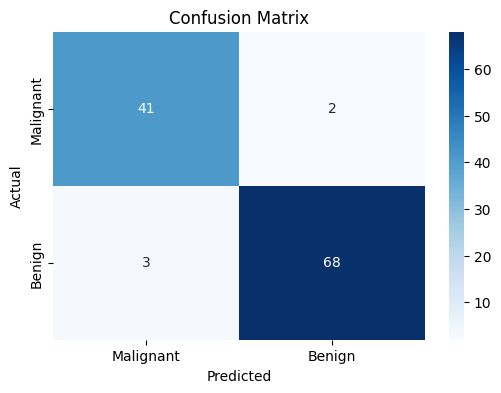

In [61]:
# Visualize confusion matrix for Linear SVM
plot_confusion_matrix(y_test, y_pred_linear)


In [73]:
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_poly = svm_poly.predict(X_test)

accuracy_poly=accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy_poly)
# Print classification report
print("SVM with poly Kernel")
print(classification_report(y_test, y_pred_poly))

Accuracy: 0.868421052631579
SVM with poly Kernel
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



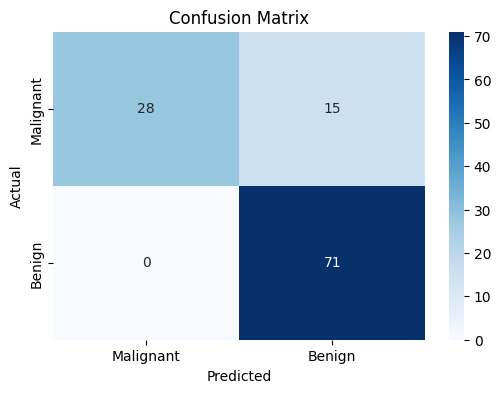

In [63]:
# Visualize confusion matrix for Polynomial SVM
plot_confusion_matrix(y_test, y_pred_poly)

In [72]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf=accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy_rbf)
# Print classification report
print("SVM with rbf Kernel")
print(classification_report(y_test, y_pred_rbf))

Accuracy: 0.9736842105263158
SVM with rbf Kernel
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



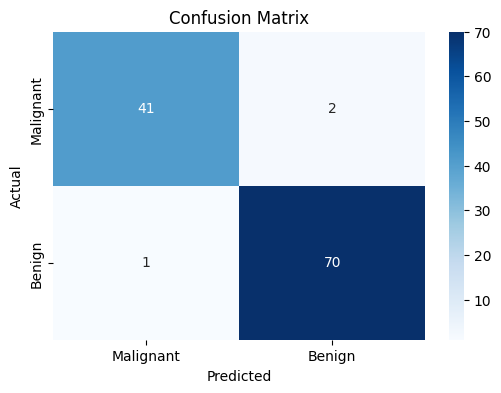

In [64]:
plot_confusion_matrix(y_test, y_pred_rbf)


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Parameter grid for hyperparameter tuning
param_grid = {'svm__C': [0.1, 1, 10, 100, 1000]}  # You can adjust these values

# Define the SVM model with different kernels
kernels = ['linear', 'rbf', 'poly']
best_models = {}

# Perform Grid Search for each kernel
for kernel in kernels:
    print(f"Hyperparameter tuning for {kernel} kernel:")
    # Define the SVM classifier with the current kernel
    svm = SVC(kernel=kernel)

    # Create a pipeline with the SVM classifier
    pipeline = Pipeline([('svm', svm)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Store the best model and its score
    best_models[kernel] = grid_search.best_estimator_

    # Print the best parameters and score
    print(f"Best Parameters for {kernel} kernel: {grid_search.best_params_}")
    print(f"Best Score for {kernel} kernel: {grid_search.best_score_}")




Hyperparameter tuning for linear kernel:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for linear kernel: {'svm__C': 0.1}
Best Score for linear kernel: 0.9758241758241759
Hyperparameter tuning for rbf kernel:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for rbf kernel: {'svm__C': 1}
Best Score for rbf kernel: 0.9736263736263737
Hyperparameter tuning for poly kernel:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for poly kernel: {'svm__C': 100}
Best Score for poly kernel: 0.956043956043956


Evaluating linear kernel:
Accuracy for linear kernel: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



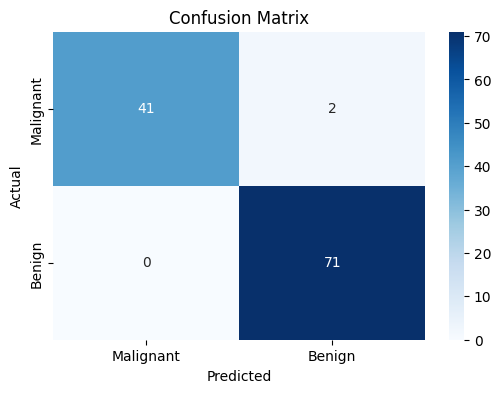

Evaluating rbf kernel:
Accuracy for rbf kernel: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



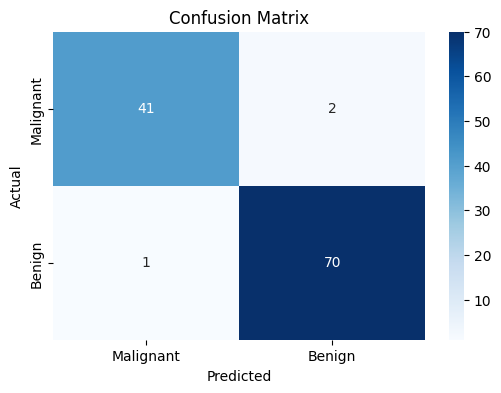

Evaluating poly kernel:
Accuracy for poly kernel: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



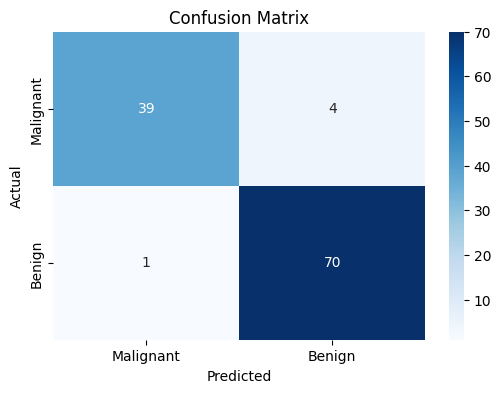

In [66]:
# Evaluate best models
for kernel, model in best_models.items():
    print(f"Evaluating {kernel} kernel:")
    y_pred = model.predict(X_test)
    print(f"Accuracy for {kernel} kernel: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)

#Ensemble learning

In ensemble learning, we combine multiple models to create a stronger, more robust model. The idea is that by combining the predictions of several models, we can reduce the variance (in case of bagging) or bias (in case of boosting), leading to better performance.

For our project, we will focus on Random Forest and Gradient Boosting as our ensemble methods. These are two of the most popular ensemble learning techniques:

Random Forest (RF) is based on bagging (Bootstrap Aggregating), where many decision trees are trained in parallel on different subsets of the data. The final prediction is made by averaging the predictions of all the trees (for regression) or by using majority voting (for classification , our case).

Gradient Boosting builds trees sequentially. Each tree tries to correct the errors made by the previous one. The final prediction is a weighted sum of all the trees' predictions.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



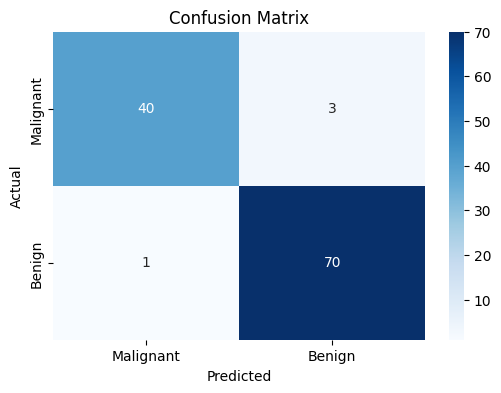

In [68]:
plot_confusion_matrix(y_test, y_pred_rf)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Accuracy: 95.61%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



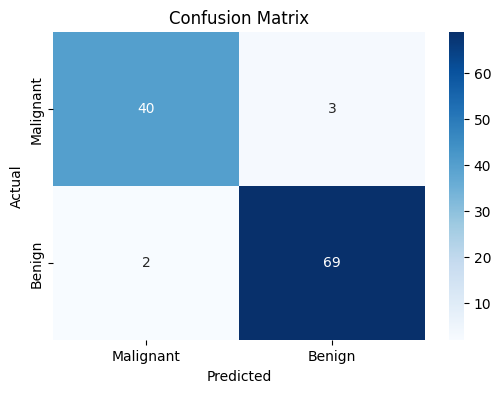

In [70]:
plot_confusion_matrix(y_test, y_pred_gb)

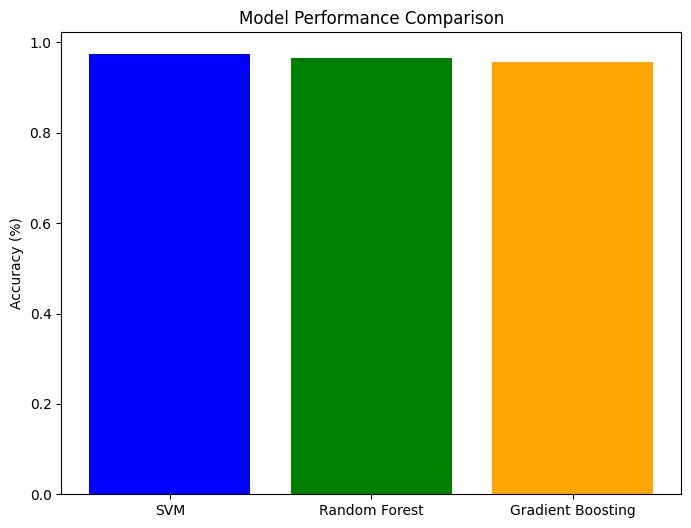

In [75]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_rbf, accuracy_rf, accuracy_gb]
models = ['SVM', 'Random Forest', 'Gradient Boosting']

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison')
plt.show()


We will tune the following hyperparameters for the Random Forest model:

n_estimators: Number of trees in the forest.

max_depth: The maximum depth of each tree.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the trees
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# Evaluate on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Accuracy and Classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy after Tuning: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 150}
Best score for Random Forest: 0.9626373626373625
Random Forest Classifier Accuracy after Tuning: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



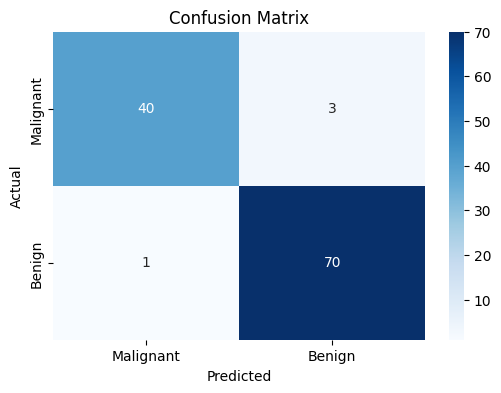

In [78]:
plot_confusion_matrix(y_test, y_pred_rf)

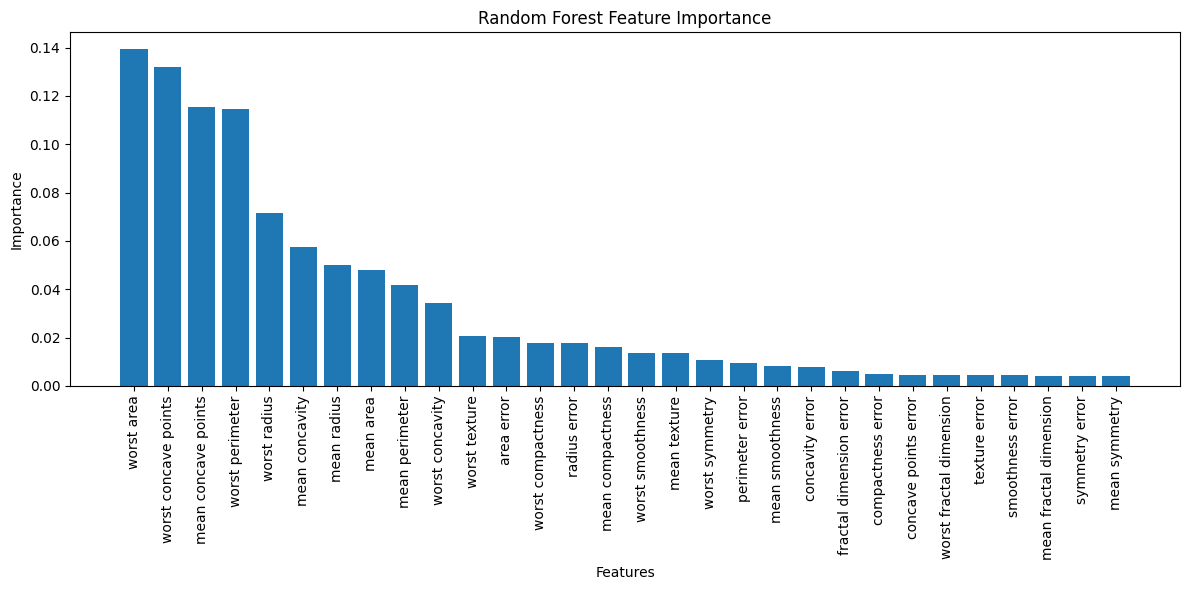

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances for Random Forest
feature_importances_rf = best_rf_model.feature_importances_

# Sort the feature importances in descending order
indices_rf = np.argsort(feature_importances_rf)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_rf], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


We will tune the following hyperparameters for the Gradient Boosting model:

n_estimators: The number of boosting stages (trees).

learning_rate: The step size at each iteration while moving toward a minimum of the loss function.

max_depth: The maximum depth of the individual trees.

subsample: The fraction of samples used for fitting each individual base learner

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting each base learner
}

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)

# Evaluate on the test set
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Accuracy and Classification report
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy after Tuning: {accuracy_gb * 100:.2f}%")
print(classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best score for Gradient Boosting: 0.9714285714285715
Gradient Boosting Classifier Accuracy after Tuning: 95.61%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



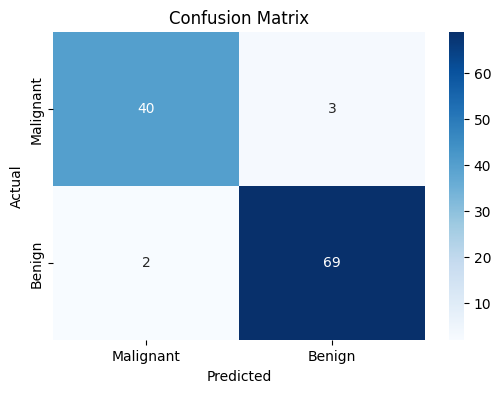

In [79]:
plot_confusion_matrix(y_test, y_pred_gb)


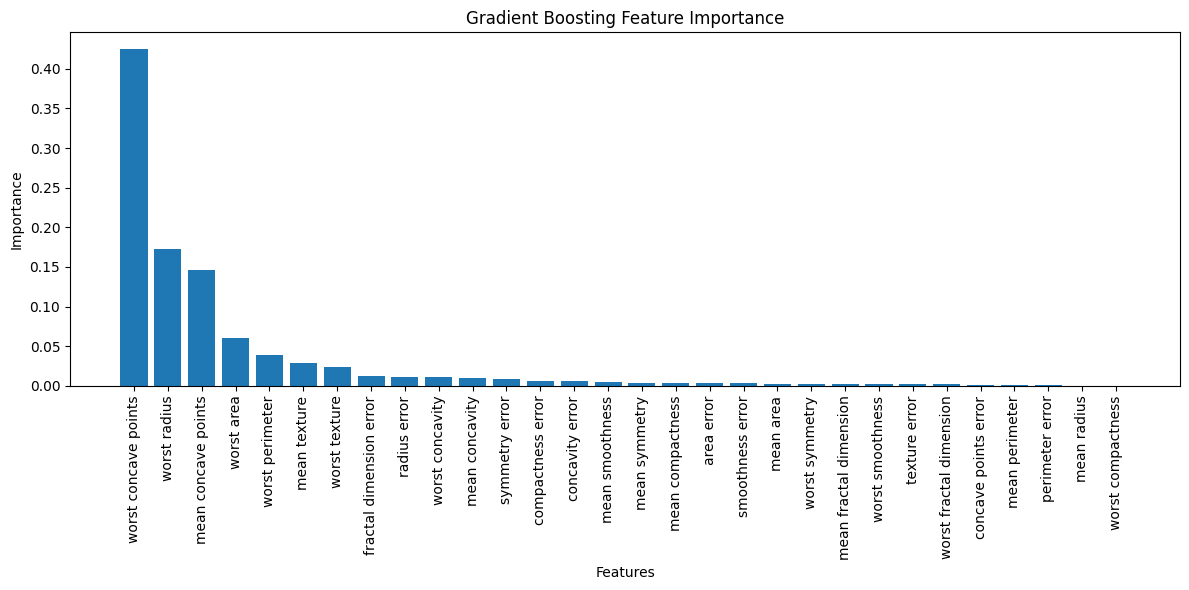

In [82]:
# Get feature importances for Gradient Boosting
feature_importances_gb = best_gb_model.feature_importances_

# Sort the feature importances in descending order
indices_gb = np.argsort(feature_importances_gb)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Gradient Boosting Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances_gb[indices_gb], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_gb], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


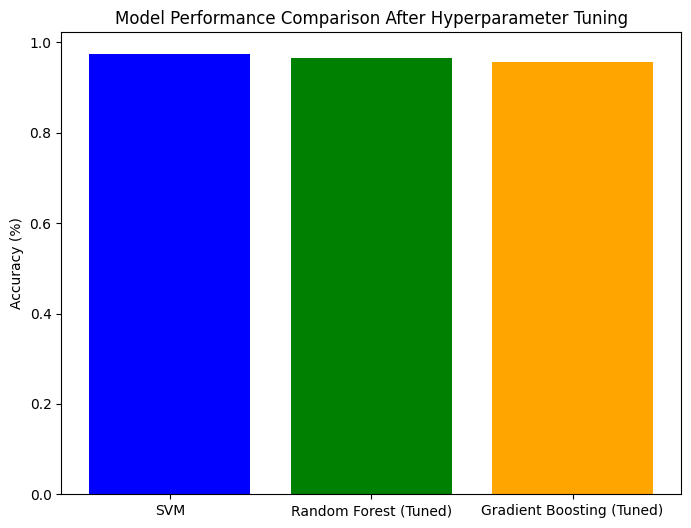

In [80]:
# Accuracy scores after tuning
accuracy_scores_tuned = [accuracy_rbf, accuracy_rf, accuracy_gb]
models = ['SVM', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)']

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores_tuned, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison After Hyperparameter Tuning')
plt.show()


#Explainability

LIME (Local Interpretable Model-agnostic Explanations):
LIME works by approximating the model with a locally interpretable, simpler model. For example, it perturbs the input data and checks how the predictions change, and then fits a simpler model (e.g., linear model) to explain the predictions for individual instances


In [83]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0c83320d24ca85fb6d232292e3e298e0cbd29060685b6d9faf0373dbf0fee8a5
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [106]:
from lime.lime_tabular import LimeTabularExplainer

# Define the explainer for tabular data
explainer = LimeTabularExplainer(
    X_train,  # Training data
    training_labels=y_train,  # Training labels
    mode='classification',  # Problem type
    class_names=['Benign', 'Malignant'],  # Classes
    feature_names=X.columns,  # Feature names
    discretize_continuous=True  # For continuous data
)



In [113]:
# Choose an instance to explain
instance = X_test[0]
print(instance)
print(y_test.iloc[0])  # Prints the first label from y_test


[-0.47069438 -0.16048584 -0.44810956 -0.49199876  0.23411429  0.02765051
 -0.10984741 -0.27623152  0.41394897  0.13217601 -0.03274296 -0.31361556
 -0.18269561 -0.22105292 -0.02932749 -0.35591235 -0.16192949 -0.23133322
 -0.32961186 -0.07901817 -0.26903951 -0.16890536 -0.33393537 -0.35629925
  0.4485028  -0.10474068 -0.02441212 -0.19956318  0.18320441  0.19695794]
1


In [108]:
import matplotlib.pyplot as plt

def visualize_lime_explanation(explainer, instance, model, num_features=30):
    """
    Generates and visualizes the LIME explanation for a single instance.

    Parameters:
    - explainer: LimeTabularExplainer object
    - instance: The data instance to explain (should be a 1D array)
    - model: The trained model (must have a .predict_proba method)
    - num_features: Number of top features to display (default: 30)

    Returns:
    - LIME explanation visualization
    """
    # Generate LIME explanation
    explanation = explainer.explain_instance(instance, model.predict_proba, num_features=num_features)

    # Get feature importance
    lime_exp = explanation.as_list()
    features, weights = zip(*lime_exp)

    # Plot feature importance
    plt.figure(figsize=(8, 5))
    plt.barh(features, weights, color=['red' if w < 0 else 'green' for w in weights])
    plt.xlabel("Feature Importance Weight")
    plt.ylabel("Features")
    plt.title("LIME Feature Importance for a Single Prediction")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

    return explanation  # Return the explanation object if needed



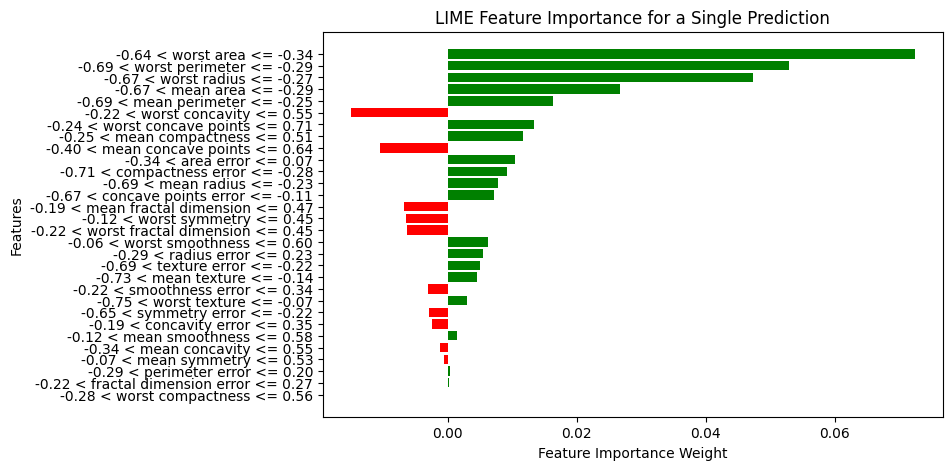

In [109]:
lime_explanation = visualize_lime_explanation(explainer, instance, rf_model)


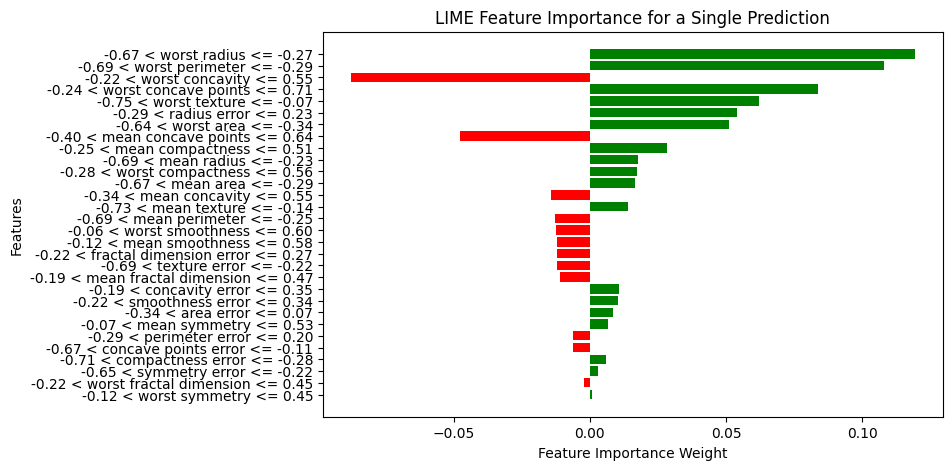

In [114]:
lime_explanation = visualize_lime_explanation(explainer, instance, gb_model)


In [115]:
instance = X_test[20]
print(instance)
print(y_test.iloc[20])

[-0.0929555  -0.8143917  -0.06339309 -0.20133147  0.30883801  0.44837335
 -0.13696614  0.04567738 -0.54624915  0.40577359 -0.45646421 -1.0819902
 -0.45001214 -0.37374478 -0.77469105 -0.26984246 -0.47426865 -0.42014527
 -1.01007305 -0.25150078  0.06229254 -0.78445489  0.09051283 -0.11985999
  0.38274896  0.63572595  0.02740114  0.3607756  -0.50435235  1.05590311]
0


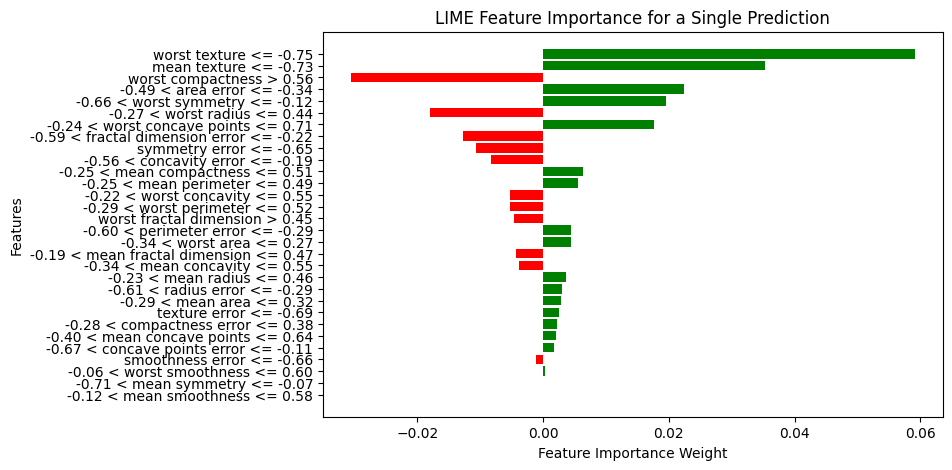

In [111]:
lime_explanation = visualize_lime_explanation(explainer, instance, rf_model)


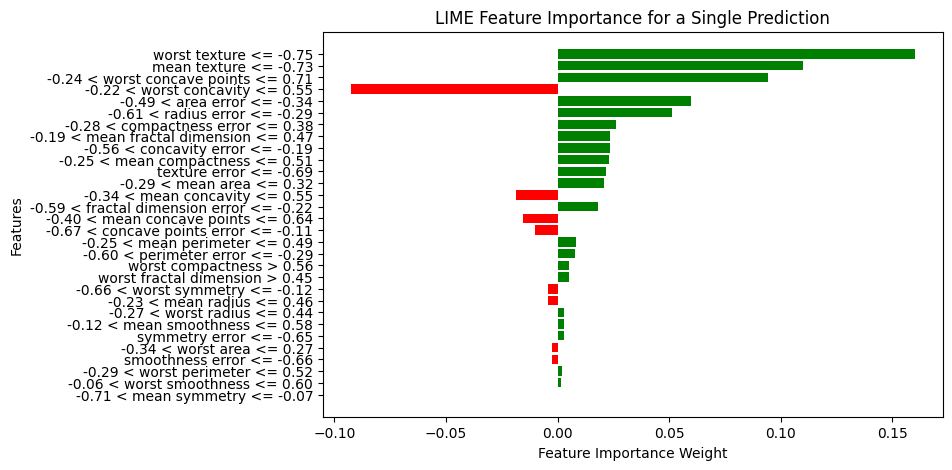

In [116]:
lime_explanation = visualize_lime_explanation(explainer, instance, gb_model)


SHAP (SHapley Additive exPlanations):
SHAP values come from cooperative game theory and are used to measure the contribution of each feature to a given prediction. It provides global and local feature importance scores

In [117]:
!pip install shap


In [131]:
import shap

In [154]:
# For Gradient Boosting
gb_explainer = shap.TreeExplainer(gb_model)
gb_shap_values = gb_explainer.shap_values(X_train)

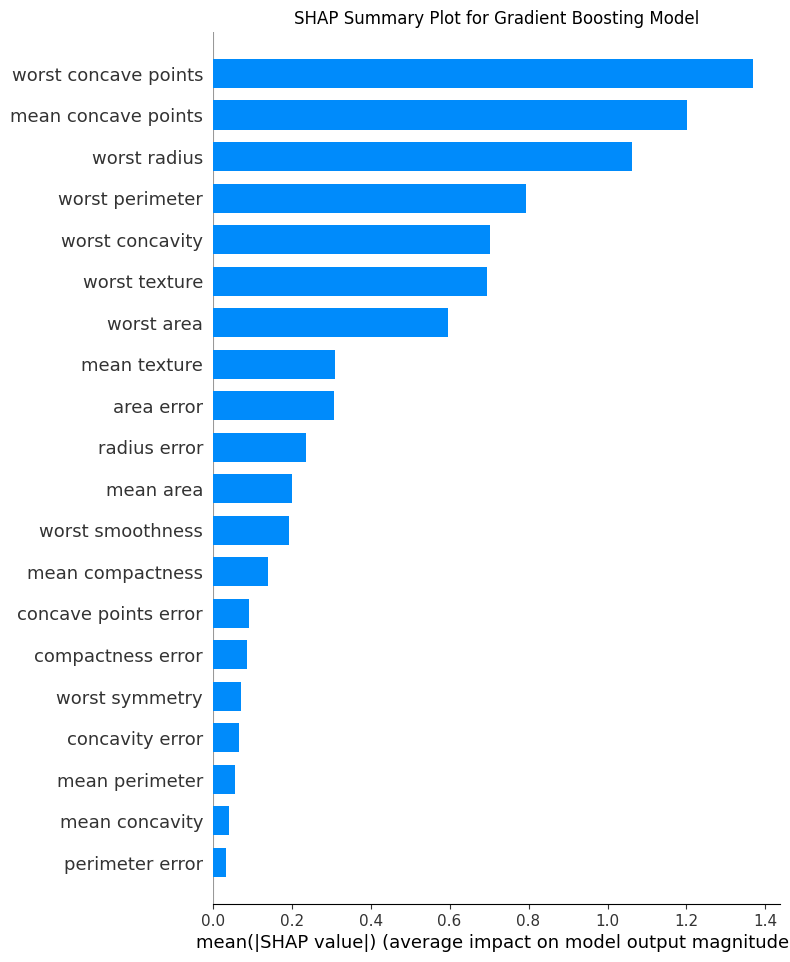

In [155]:
import matplotlib.pyplot as plt

# Assuming you have gb_shap_values, X_train, and

# Summary plot with feature names, sorted by importance, and a title
shap.summary_plot(
    gb_shap_values,
    X_train,
    feature_names=X.columns,
    plot_type="bar",
    show=False #stops the plot from showing automatically, so we can add to it.
)

plt.title("SHAP Summary Plot for Gradient Boosting Model")
plt.show()